# Create dataset for networks

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## Merge the final full dataset with rating.csv and user.csv

In [4]:
# Load the CSV files
df1 = pd.read_csv('final_dataset.csv')
df2 = pd.read_csv('/Users/chrysentiaclarissa/Downloads/Capstone ML/NLP Book Recommendation System/Book-Recommendation-System-main/raw dataset/Ratings.csv')

# Merge the books with description and ratings dataset
df3 = pd.merge(df1, df2, on='isbn', how='inner')
df3.head()

,isbn,book_title,book_author,year_of_publication,publisher,description,bow,categories,page_count,User-ID,Book-Rating
0,0195153448,classical mythology,mark_p_morford,2002.0,oxford_university_press,provides introduction classical myth placing a...,mark_p_morford oxford_university_press,social_science,808.0,2,0.0
1,0002005018,clara callan,richard_bruce_wright,2001.0,harperflamingo_canada,small town canada clara callan reluctantly tak...,richard_bruce_wright harperflamingo_canada,actresses,414.0,8,5.0
2,0002005018,clara callan,richard_bruce_wright,2001.0,harperflamingo_canada,small town canada clara callan reluctantly tak...,richard_bruce_wright harperflamingo_canada,actresses,414.0,11400,0.0
3,0002005018,clara callan,richard_bruce_wright,2001.0,harperflamingo_canada,small town canada clara callan reluctantly tak...,richard_bruce_wright harperflamingo_canada,actresses,414.0,11676,8.0
4,0002005018,clara callan,richard_bruce_wright,2001.0,harperflamingo_canada,small town canada clara callan reluctantly tak...,richard_bruce_wright harperflamingo_canada,actresses,414.0,41385,0.0


In [5]:
df4 = pd.read_csv('/Users/chrysentiaclarissa/Downloads/Capstone ML/NLP Book Recommendation System/Book-Recommendation-System-main/raw dataset/Users.csv')

# Convert 'User-ID' column to string in both DataFrames
df3['User-ID'] = df3['User-ID'].astype(str)
df4['User-ID'] = df4['User-ID'].astype(str)

# Merge the (books with description and ratings) dataset and users dataset
merged_df = pd.merge(df3, df4, on='User-ID', how='inner')
merged_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,description,bow,categories,page_count,User-ID,Book-Rating,Location,Age
0,0195153448,classical mythology,mark_p_morford,2002.0,oxford_university_press,provides introduction classical myth placing a...,mark_p_morford oxford_university_press,social_science,808.0,2,0.0,"stockton, california, usa",18.0
1,0002005018,clara callan,richard_bruce_wright,2001.0,harperflamingo_canada,small town canada clara callan reluctantly tak...,richard_bruce_wright harperflamingo_canada,actresses,414.0,8,5.0,"timmins, ontario, canada",NaN
2,0002005018,clara callan,richard_bruce_wright,2001.0,harperflamingo_canada,small town canada clara callan reluctantly tak...,richard_bruce_wright harperflamingo_canada,actresses,414.0,11400,0.0,"ottawa, ontario, canada",49.0
3,0002005018,clara callan,richard_bruce_wright,2001.0,harperflamingo_canada,small town canada clara callan reluctantly tak...,richard_bruce_wright harperflamingo_canada,actresses,414.0,11676,8.0,"n/a, n/a, n/a",NaN
4,0002005018,clara callan,richard_bruce_wright,2001.0,harperflamingo_canada,small town canada clara callan reluctantly tak...,richard_bruce_wright harperflamingo_canada,actresses,414.0,41385,0.0,"sudbury, ontario, canada",NaN


In [6]:
merged_df.rename(columns = {'User-ID':'userID', 'Book-Rating':'book_rating', 'Age':'age'}, inplace = True)

In [7]:
# Drop the specified columns
merged_df.drop(columns=['bow', 'Location', 'book_author', 'publisher'], inplace=True)

In [8]:
merged_df.head()

,isbn,book_title,year_of_publication,description,categories,page_count,userID,book_rating,age
0,0195153448,classical mythology,2002.0,provides introduction classical myth placing a...,social_science,808.0,2,0.0,18.0
1,0002005018,clara callan,2001.0,small town canada clara callan reluctantly tak...,actresses,414.0,8,5.0,NaN
2,0002005018,clara callan,2001.0,small town canada clara callan reluctantly tak...,actresses,414.0,11400,0.0,49.0
3,0002005018,clara callan,2001.0,small town canada clara callan reluctantly tak...,actresses,414.0,11676,8.0,NaN
4,0002005018,clara callan,2001.0,small town canada clara callan reluctantly tak...,actresses,414.0,41385,0.0,NaN


In [9]:
merged_df.shape

(164838, 9)

In [10]:
merged_df.isnull().sum()

isbn                       0
book_title               243
year_of_publication        0
description                0
categories              1058
page_count                86
userID                     0
book_rating                0
age                    46540
dtype: int64

## Handle the issue in age column

In [11]:
# Unique value in age
merged_df['age'].unique()

array([ 18.,  nan,  49.,  30.,  36.,  29.,  60.,  71.,  40.,  53.,  65.,
        46.,  47.,  26.,  56.,  37.,  39.,  25.,  27.,  31.,  41.,  20.,
        58.,  42.,  38.,  52.,  21.,  33.,  34.,  19.,  57.,  51.,  28.,
        23.,  72.,  32.,  54.,  45.,  22.,  24.,  44.,  81.,  43.,  70.,
        17.,  67.,  35.,  59.,  15.,  64.,  16.,  62.,  48.,  13.,  75.,
        68.,  50.,  14.,  76.,  55., 128.,  61.,  69.,  73., 104.,  63.,
        66.,   0.,  74.,  77.,  79.,   7., 116., 239., 103.,  12., 201.,
       204.,  90.,  80.,   2.,  85.,   3.,   1.,  83., 151.,   8., 209.,
        78., 100.,   9.,  10., 168.,  82., 133.,   4.,  97.,  11.,  84.,
        93.,  99., 136., 152., 101.,  92.,   5., 141., 108., 148., 219.,
       228.,  94., 124., 212., 220., 105., 244., 199.])

In [12]:
# Impute reasonable value for age less than 5 and more than 90 using median
median_age = merged_df[(merged_df['age'] >= 5) & (merged_df['age'] <= 90)]['age'].median()
merged_df.loc[(merged_df['age'] < 5) | (merged_df['age'] > 90), 'age'] = median_age

In [13]:
# Checking unique value of age once again
merged_df['age'].unique()

array([18., nan, 49., 30., 36., 29., 60., 71., 40., 53., 65., 46., 47.,
       26., 56., 37., 39., 25., 27., 31., 41., 20., 58., 42., 38., 52.,
       21., 33., 34., 19., 57., 51., 28., 23., 72., 32., 54., 45., 22.,
       24., 44., 81., 43., 70., 17., 67., 35., 59., 15., 64., 16., 62.,
       48., 13., 75., 68., 50., 14., 76., 55., 61., 69., 73., 63., 66.,
       74., 77., 79.,  7., 12., 90., 80., 85., 83.,  8., 78.,  9., 10.,
       82., 11., 84.,  5.])

In [14]:
# Calculate the mean age
mean_age = round(merged_df['age'].mean())

# Impute missing ages with the mean age
merged_df['age'] = merged_df['age'].fillna(mean_age)

In [15]:
merged_df['age'].unique()

array([18., 37., 49., 30., 36., 29., 60., 71., 40., 53., 65., 46., 47.,
       26., 56., 39., 25., 27., 31., 41., 20., 58., 42., 38., 52., 21.,
       33., 34., 19., 57., 51., 28., 23., 72., 32., 54., 45., 22., 24.,
       44., 81., 43., 70., 17., 67., 35., 59., 15., 64., 16., 62., 48.,
       13., 75., 68., 50., 14., 76., 55., 61., 69., 73., 63., 66., 74.,
       77., 79.,  7., 12., 90., 80., 85., 83.,  8., 78.,  9., 10., 82.,
       11., 84.,  5.])

In [16]:
merged_df.isnull().sum()

isbn                      0
book_title              243
year_of_publication       0
description               0
categories             1058
page_count               86
userID                    0
book_rating               0
age                       0
dtype: int64

## Drop the rows with missing value

In [17]:
# Drop rows with any missing values
merged_df.dropna(inplace=True)

In [18]:
# Check the missing value again
merged_df.isnull().sum()

isbn                   0
book_title             0
year_of_publication    0
description            0
categories             0
page_count             0
userID                 0
book_rating            0
age                    0
dtype: int64

In [19]:
merged_df.shape

(163514, 9)

## K-means clustering for categories

In [20]:
# How many unique value in categories?
merged_df['categories'].nunique()

1581

In [21]:
# Count frequency of each category
category_counts = merged_df['categories'].explode().value_counts()
print(category_counts)

categories
fiction                                          105304
juvenile_fiction                                   7271
biography_&_autobiography                          5567
american_fiction                                   1674
humor                                              1600
                                                  ...  
hallucinogenic_drugs_and_religious_experience         1
human_experimentation_in_medicine                     1
mediums                                               1
spirit_writings                                       1
nuclear_energy                                        1
Name: count, Length: 1581, dtype: int64


There are too many categories. Remove the categories that appear very rarely across the dataset.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
from nltk.tokenize import word_tokenize

/Users/chrysentiaclarissa/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [23]:
def format_category(category):
  # Replace underscores with spaces
  formatted_category = category.replace('_', ' ')
  return formatted_category

merged_df['categories'] = merged_df['categories'].apply(format_category)
merged_df.head()

,isbn,book_title,year_of_publication,description,categories,page_count,userID,book_rating,age
0,0195153448,classical mythology,2002.0,provides introduction classical myth placing a...,social science,808.0,2,0.0,18.0
1,0002005018,clara callan,2001.0,small town canada clara callan reluctantly tak...,actresses,414.0,8,5.0,37.0
2,0002005018,clara callan,2001.0,small town canada clara callan reluctantly tak...,actresses,414.0,11400,0.0,49.0
3,0002005018,clara callan,2001.0,small town canada clara callan reluctantly tak...,actresses,414.0,11676,8.0,37.0
4,0002005018,clara callan,2001.0,small town canada clara callan reluctantly tak...,actresses,414.0,41385,0.0,37.0


### Perform Doc2Vec to 'categories' and 'description'

In [24]:
# Preprocess the columns
merged_df['categories_tokens'] = merged_df['categories'].apply(lambda x: word_tokenize(x.lower()))
merged_df['description_tokens'] = merged_df['description'].apply(lambda x: word_tokenize(x.lower()))

In [25]:
# Prepare the TaggedDocument for Doc2Vec
category_documents = [TaggedDocument(words, [i]) for i, words in enumerate(merged_df['categories_tokens'])]
description_documents = [TaggedDocument(words, [i]) for i, words in enumerate(merged_df['description_tokens'])]

In [26]:
# Train separate Doc2Vec models
category_doc2vec_model = Doc2Vec(category_documents, vector_size=20, window=2, min_count=1, workers=4, epochs=50)
description_doc2vec_model = Doc2Vec(description_documents, vector_size=20, window=2, min_count=1, workers=4, epochs=50)

In [28]:
# Transform the preprocessed text data into vectors using separate models
merged_df['doc2vec_categories'] = merged_df['categories_tokens'].apply(lambda x: category_doc2vec_model.infer_vector(x))
merged_df['doc2vec_description'] = merged_df['description_tokens'].apply(lambda x: description_doc2vec_model.infer_vector(x))

### Determine the optimal K

In [27]:
# Extract the vectors for clustering
cat_vectors = np.array(merged_df['doc2vec_categories'].tolist())

KeyError: 'doc2vec_categories'

In [28]:
def silhouette_scores(data):
    silhouette_scores = []
    for i in range(2, 11):  # Silhouette score is not defined for K=1
        kmeans = KMeans(n_clusters=i, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

# Calculate silhouette scores for different values of K
silhouette_scores = silhouette_scores(cat_vectors)

In [41]:
cat_vectors.shape

(163514, 20)

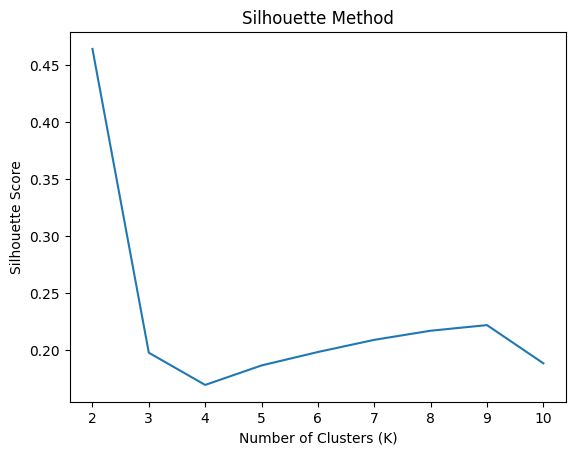

In [29]:
# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

### K-means modelling

In [30]:
# KMeans model
kmeans = KMeans(n_clusters = 4)
merged_df['category_cluster'] = kmeans.fit_predict(cat_vectors)

In [31]:
# Display the resulting DataFrame
print(merged_df[['categories', 'category_cluster']])

            categories  category_cluster
0       social science                 3
1            actresses                 3
2            actresses                 3
3            actresses                 3
4            actresses                 3
...                ...               ...
164833         fiction                 1
164834         fiction                 1
164835         fiction                 1
164836         fiction                 1
164837         fiction                 1

[163514 rows x 2 columns]


In [32]:
merged_df['category_cluster'].value_counts()

category_cluster
1    63292
2    55055
3    31053
0    14114
Name: count, dtype: int64

In [33]:
merged_df.head()

,isbn,book_title,year_of_publication,description,categories,page_count,userID,book_rating,age,categories_tokens,description_tokens,doc2vec_categories,doc2vec_description,category_cluster
0,0195153448,classical mythology,2002.0,provides introduction classical myth placing a...,social science,808.0,2,0.0,18.0,"[social, science]","[provides, introduction, classical, myth, plac...","[0.17724226, -0.025548164, -0.07163972, 0.0970...","[0.406688, 0.3585072, 1.3337185, -1.1271342, -...",3
1,0002005018,clara callan,2001.0,small town canada clara callan reluctantly tak...,actresses,414.0,8,5.0,37.0,[actresses],"[small, town, canada, clara, callan, reluctant...","[-0.17754874, 0.29921842, 0.13401474, 0.109431...","[0.3871521, -0.37511307, 1.1218337, -0.6350674...",3
2,0002005018,clara callan,2001.0,small town canada clara callan reluctantly tak...,actresses,414.0,11400,0.0,49.0,[actresses],"[small, town, canada, clara, callan, reluctant...","[-0.14406453, 0.35097718, 0.17540002, 0.041971...","[0.48701698, -0.3339445, 0.8510677, -0.3864715...",3
3,0002005018,clara callan,2001.0,small town canada clara callan reluctantly tak...,actresses,414.0,11676,8.0,37.0,[actresses],"[small, town, canada, clara, callan, reluctant...","[-0.17291078, 0.3294236, 0.1421148, 0.14924079...","[0.422265, -0.5055285, 0.9891314, -0.5679308, ...",3
4,0002005018,clara callan,2001.0,small town canada clara callan reluctantly tak...,actresses,414.0,41385,0.0,37.0,[actresses],"[small, town, canada, clara, callan, reluctant...","[-0.16886835, 0.3728295, 0.18178052, 0.0934242...","[0.7002524, -0.41130117, 1.0479298, -0.5149132...",3


In [72]:
merged_df.isnull().sum()

isbn                   0
book_title             0
year_of_publication    0
description            0
categories             0
page_count             0
userID                 0
book_rating            0
age                    0
categories_tokens      0
description_tokens     0
doc2vec_categories     0
doc2vec_description    0
category_cluster       0
dtype: int64

In [40]:
merged_df.to_csv('merged.csv', index=False)

## Create dataset for user network

In [91]:
### USE THIS ONE AND PROCEED TO JUST SAVE AFTER THIS

# Calculate the count of each genre cluster for each user
cluster_counts = merged_df.pivot_table(index='userID', columns='category_cluster', aggfunc='size', fill_value=0)

# Calculate the mean page count for each user
mean_page_count = merged_df.groupby('userID')['page_count'].mean()

# Get the age for each user (assuming age is constant per user)
age = merged_df.groupby('userID')['age'].first()

# Combine the results
users = cluster_counts.join(mean_page_count.rename('mean_page_count')).join(age.rename('age'))
print(users)

        0  1  2   3  mean_page_count   age
userID                                    
10      0  0  0   1         0.000000  26.0
100004  0  2  2   1       304.800000  35.0
100009  0  7  1   2       467.300000  49.0
10001   1  1  2   4       337.250000  47.0
100010  0  1  1   0       130.000000  37.0
...    .. .. ..  ..              ...   ...
99954   0  0  1   1       378.000000  39.0
99955   0  8  8  13       265.000000  14.0
99968   0  1  0   0       296.000000  32.0
99973   0  0  1   0       292.000000  34.0
99996   1  4  2   2       318.777778  43.0

[33202 rows x 6 columns]


In [1]:
### DO NOT USE THIS ONE

# Data frame needed for users
keep_columns = ['userID', 'isbn', 'categories', 'category_cluster', 'page_count', 'age']
users = merged_df[keep_columns]

# One-hot encode the category clusters
category_clusters = pd.get_dummies(merged_df['category_cluster'], prefix='cluster')

# Concatenate the one-hot encoded clusters with the original dataframe
users = pd.concat([users, category_clusters], axis=1)

# Convert boolean True/False to integers 1/0
users[category_clusters.columns] = users[category_clusters.columns].astype(int)

# Display the dataframe
users.head()

NameError: name 'merged_df' is not defined

In [56]:
# Select the necessary columns: userID, ISBN, and the one-hot encoded category clusters
final_columns = ['userID', 'isbn'] + category_clusters.columns.tolist()
users = users[final_columns]
users.head()

,userID,isbn,cluster_0,cluster_1,cluster_2,cluster_3
0,2,0195153448,0,0,0,1
1,8,0002005018,0,0,0,1
2,11400,0002005018,0,0,0,1
3,11676,0002005018,0,0,0,1
4,41385,0002005018,0,0,0,1


In [57]:
users.shape

(163514, 6)

In [58]:
# Count the number of occurrences of each userID
user_id_counts = users['userID'].value_counts()

# Filter to show only userID values that appear more than once
duplicate_user_ids = user_id_counts[user_id_counts > 1]
print(duplicate_user_ids)

userID
11676     1722
35859      870
153662     647
198711     552
76352      533
          ... 
241268       2
15228        2
218421       2
33432        2
232410       2
Name: count, Length: 13641, dtype: int64


### Save the dataset to csv file

In [92]:
# Save the data
users.to_csv('users.csv', index=False)

## Create dataset for book network

In [86]:
# Specify the columns you want to keep
keep_columns = ['isbn', 'doc2vec_categories', 'doc2vec_description', 'page_count']

# Create the new subset DataFrame with the specified columns
books = merged_df[keep_columns]
books.head()

,isbn,doc2vec_categories,doc2vec_description,page_count
0,0195153448,"[0.17724226, -0.025548164, -0.07163972, 0.0970...","[0.406688, 0.3585072, 1.3337185, -1.1271342, -...",808.0
1,0002005018,"[-0.17754874, 0.29921842, 0.13401474, 0.109431...","[0.3871521, -0.37511307, 1.1218337, -0.6350674...",414.0
2,0002005018,"[-0.14406453, 0.35097718, 0.17540002, 0.041971...","[0.48701698, -0.3339445, 0.8510677, -0.3864715...",414.0
3,0002005018,"[-0.17291078, 0.3294236, 0.1421148, 0.14924079...","[0.422265, -0.5055285, 0.9891314, -0.5679308, ...",414.0
4,0002005018,"[-0.16886835, 0.3728295, 0.18178052, 0.0934242...","[0.7002524, -0.41130117, 1.0479298, -0.5149132...",414.0


In [87]:
# Ensure each vector is properly stored as a list of floats
books['doc2vec_categories'] = books['doc2vec_categories'].apply(lambda x: list(x))
books['doc2vec_description'] = books['doc2vec_description'].apply(lambda x: list(x))

# Split 'doc2vec_categories' into separate columns
categories_df = pd.DataFrame(books['doc2vec_categories'].tolist(), columns=[f'cat_vec_{i+1}' for i in range(20)])

# Split 'doc2vec_description' into separate columns
description_df = pd.DataFrame(books['doc2vec_description'].tolist(), columns=[f'desc_vec_{i+1}' for i in range(20)])

# Concatenate the new columns with 'page_count' column
books = pd.concat([books['isbn'], categories_df, description_df, books['page_count']], axis=1)
books.head()

/var/folders/p9/mn6vkky11nqc53tyvzjg4xj80000gn/T/ipykernel_40321/1697010463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['doc2vec_categories'] = books['doc2vec_categories'].apply(lambda x: list(x))
/var/folders/p9/mn6vkky11nqc53tyvzjg4xj80000gn/T/ipykernel_40321/1697010463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['doc2vec_description'] = books['doc2vec_description'].apply(lambda x: list(x))


,isbn,cat_vec_1,cat_vec_2,cat_vec_3,cat_vec_4,cat_vec_5,cat_vec_6,cat_vec_7,cat_vec_8,cat_vec_9,...,desc_vec_12,desc_vec_13,desc_vec_14,desc_vec_15,desc_vec_16,desc_vec_17,desc_vec_18,desc_vec_19,desc_vec_20,page_count
0,0195153448,0.177242,-0.025548,-0.071640,0.097087,-0.179107,-0.039103,0.221959,0.130537,-0.187101,...,0.390173,-0.299371,0.067378,-0.406473,0.927010,-0.137838,0.221249,-0.142201,-1.166863,808.0
1,0002005018,-0.177549,0.299218,0.134015,0.109432,-0.087066,0.048365,0.164578,0.037141,-0.381251,...,0.108623,-0.961141,-0.012924,-0.663211,0.922686,0.632078,1.145885,1.335396,0.360488,414.0
2,0002005018,-0.144065,0.350977,0.175400,0.041972,-0.142646,0.074127,0.125837,0.058516,-0.260554,...,0.095390,-1.012143,-0.096692,-0.709376,0.851086,0.580994,1.173394,1.264911,0.147226,414.0
3,0002005018,-0.172911,0.329424,0.142115,0.149241,-0.111801,0.143405,0.117791,0.055580,-0.334047,...,0.014023,-0.873615,-0.037510,-0.764126,1.061661,0.644290,1.167669,1.391760,0.335471,414.0
4,0002005018,-0.168868,0.372829,0.181781,0.093424,-0.064207,0.125295,0.203568,0.084338,-0.273797,...,0.024412,-0.936482,-0.086925,-0.647693,1.042733,0.681125,1.250890,1.098135,0.269964,414.0


In [88]:
books.shape

(164803, 42)

In [89]:
# Trimming the extra rows
books = books.iloc[:163514]
books.shape

(163514, 42)

### Save the dataset to csv file

In [90]:
books.to_csv('books.csv', index=False)

## Create the y_train dataset

In [83]:
# Specify the columns you want to keep
keep_columns2 = ['userID', 'isbn', 'book_rating']

# Create the new subset DataFrame with the specified columns
ratings = merged_df[keep_columns2]
print(ratings.shape)

(163514, 3)


In [84]:
ratings.head()

,userID,isbn,book_rating
0,2,0195153448,0.0
1,8,0002005018,5.0
2,11400,0002005018,0.0
3,11676,0002005018,8.0
4,41385,0002005018,0.0


In [85]:
ratings.to_csv('ratings.csv', index=False)